In [2]:
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    """Load dataset and weights with error handling"""
    try:
        dataset = np.loadtxt("dataset.txt")
        print(f"Loaded {len(dataset)} data points")
    except Exception as e:
        print("Dataset loading failed:", e)
        return None, None
    
    try:
        weights = []
        with open("weights_history.txt", "r") as f:
            for line in f:
                if line.startswith("iteration"):
                    # Extract weights after colon and split by commas
                    weight_str = line.split(":")[1].strip()
                    weights.append([float(w) for w in weight_str.split(" ")])
        print(f"Loaded {len(weights)} weight snapshots")
    except Exception as e:
        print("Weights loading failed:", e)
        return dataset, None
    
    return dataset, weights

def plot_comparison(dataset, weights):
    """Create comparison plot between data and final weights"""
    plt.figure(figsize=(12, 6))
    
    # Plot dataset as blue dots
    plt.scatter(dataset, np.zeros_like(dataset), 
                c='blue', alpha=0.3, label='Dataset', s=50)
    
    if weights:
        # Extract final weights
        final_weights = weights[-1]
        x_weights = np.linspace(0, 1, len(final_weights))
        
        # Plot weights as red dots
        plt.scatter(final_weights, np.zeros_like(final_weights),
                    c='red', alpha=0.7, label='SOM Weights', s=80,
                    edgecolors='black')
    
    plt.title("1D SOM: Dataset vs Learned Weights")
    plt.yticks([])  # Hide y-axis
    plt.xlabel("Value")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

Loaded 100 data points
Loaded 1000000 weight snapshots


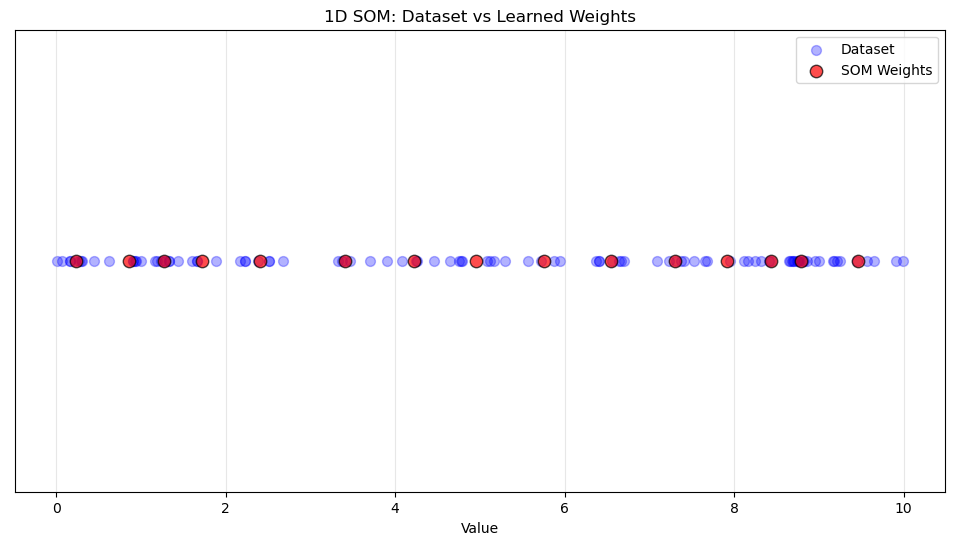

In [3]:
dataset, weights = load_data()
    
if dataset is None:
        print("Cannot plot - missing dataset")
elif not weights:
        print("Cannot plot - missing weights")
else:
        plot_comparison(dataset, weights)